<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Analisis_Trend_%26_Time_Series_(World_Dataset_Covid_19)_for_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Unduh dan baca dataset OWID
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, parse_dates=['date'])

# Filter untuk data Malaysia
malaysia = df[df['location'] == 'Malaysia'][['date', 'new_cases']]
malaysia = malaysia.dropna()
malaysia.set_index('date', inplace=True)
malaysia = malaysia[malaysia['new_cases'] >= 0]  # Hapus nilai negatif
malaysia.head()


,new_cases
date,
2020-01-05,0.0
2020-01-06,0.0
2020-01-07,0.0
2020-01-08,0.0
2020-01-09,0.0


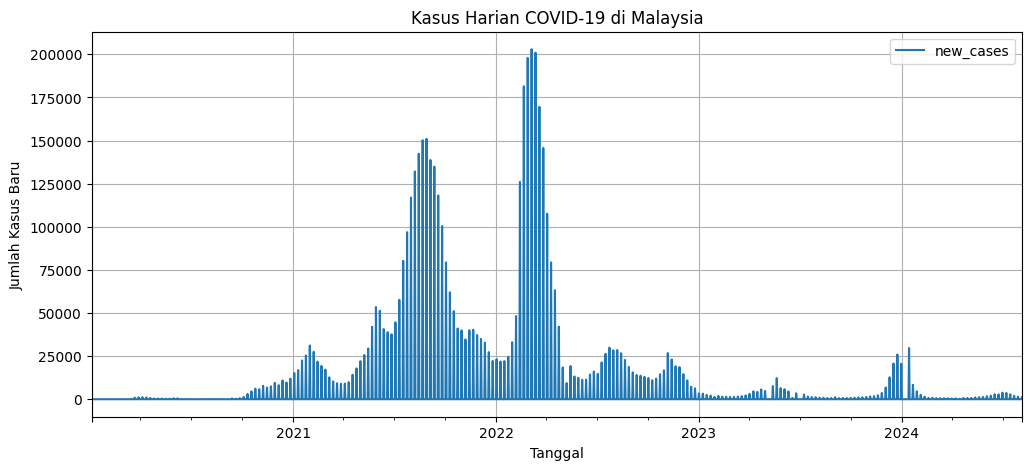

In [ ]:
import matplotlib.pyplot as plt

malaysia.plot(title='Kasus Harian COVID-19 di Malaysia', figsize=(12, 5))
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.grid(True)
plt.show()

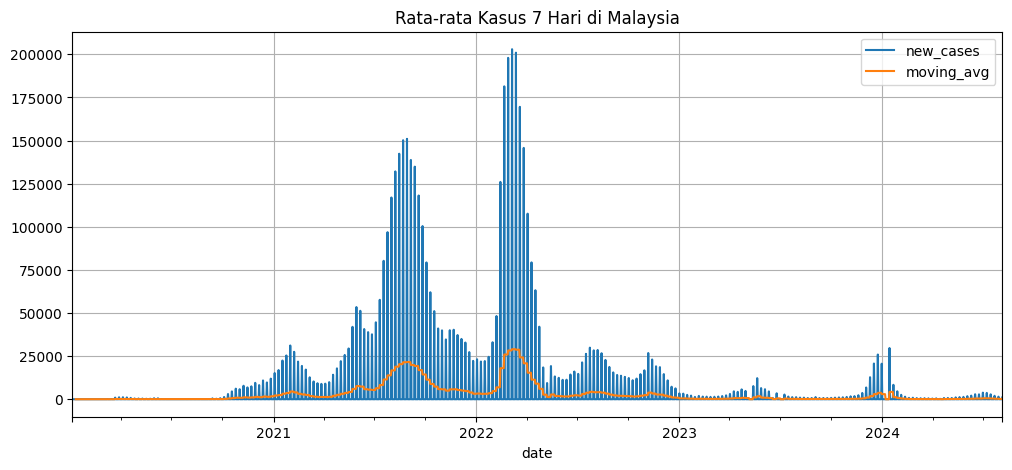

In [ ]:
# Hitung rata-rata bergerak 7 hari

malaysia['moving_avg'] = malaysia['new_cases'].rolling(window=7).mean()
# Plot kasus baru dan moving average
malaysia[['new_cases', 'moving_avg']].plot(title='Rata-rata Kasus 7 Hari di Malaysia', figsize=(12, 5))
plt.grid(True)
plt.show()

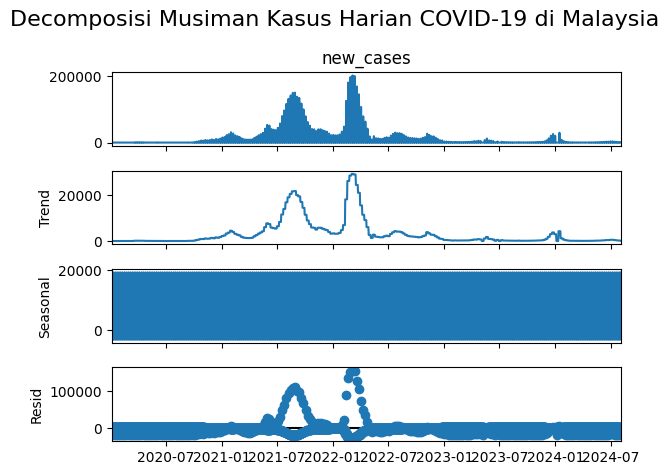

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Gunakan model aditif untuk data Malaysia
decomp = seasonal_decompose(malaysia['new_cases'], model='additive', period=7)
decomp.plot()
plt.suptitle('Decomposisi Musiman Kasus Harian COVID-19 di Malaysia', fontsize=16)
plt.tight_layout()
plt.show()


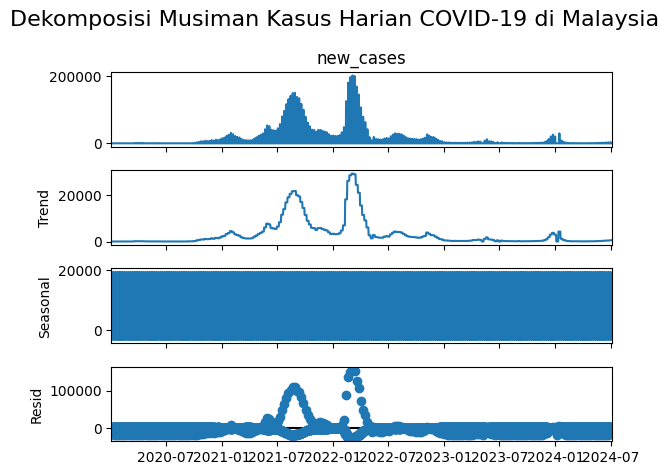

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Membagi dataset Malaysia menjadi data latih dan data uji
train = malaysia.iloc[:-30]   # Semua data kecuali 30 hari terakhir
test = malaysia.iloc[-30:]    # 30 hari terakhir sebagai data uji

# Lakukan dekomposisi musiman pada data pelatihan
# Gunakan model aditif karena kasus harian memiliki fluktuasi linier
decomp = seasonal_decompose(train['new_cases'], model='additive', period=7)
decomp.plot()
plt.suptitle('Dekomposisi Musiman Kasus Harian COVID-19 di Malaysia', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Latih model ARIMA dengan data Malaysia (misal p=2, d=1, q=2)
model = ARIMA(train['new_cases'], order=(2, 1, 2))
model_fit = model.fit()

# Prediksi 30 hari ke depan
forecast = model_fit.forecast(steps=30)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

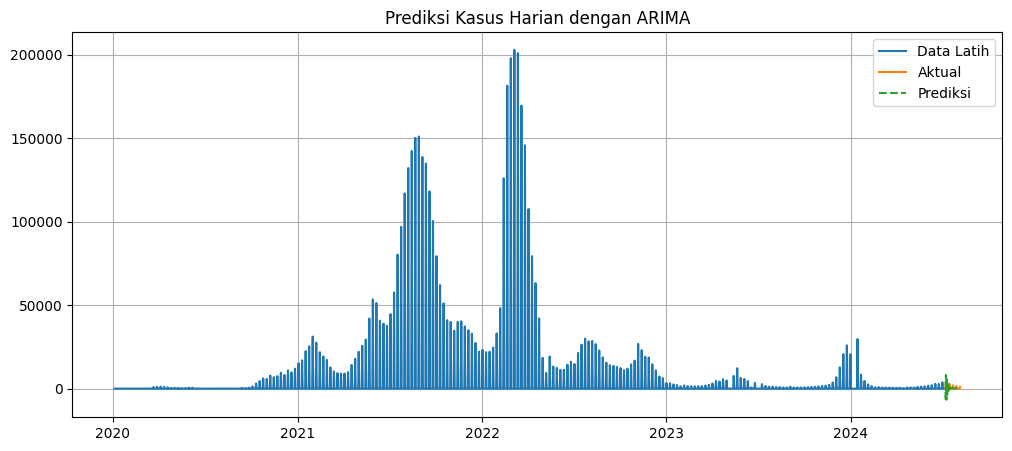

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['new_cases'], label='Data Latih')
plt.plot(test.index, test['new_cases'], label='Aktual')
plt.plot(test.index, forecast, label='Prediksi', linestyle='--')

plt.legend()
plt.title('Prediksi Kasus Harian dengan ARIMA')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np  # Import numpy

# Hitung MAE (Mean Absolute Error)
mae = mean_absolute_error(test['new_cases'], forecast)

# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(test['new_cases'], forecast)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Tampilkan hasil
print(f"MAE untuk data Malaysia: {mae:.2f}")
print(f"RMSE untuk data Malaysia: {rmse:.2f}")


MAE untuk data Malaysia: 1444.28
RMSE untuk data Malaysia: 2430.81
